## A * Algorithm

* Base line Algo : Breadth first search with f(n) = g(n) + h(n) , chossing breadth to explore, g(n) is cost to reach till current point, h(n) cost to reach till destination

#### Heuristic function
* Euclidian distance = sqrt { abs(y2-y1)^2 + abs(x2-x1)^2 }
* Manhattan distance = abs(y2-y1) + abs(x2-x1)

* Effect of Heurisitc function 


```cpp
/*
	FathomRadiant Case

*/

#include <bits/stdc++.h>
using namespace std;

/* Each Cell has char '-' 'x'  's' 'g' */
typedef char Cell ; 
typedef vector<Cell> CellRow;
typedef vector<CellRow> MazeType;
typedef pair<int,int>  CellLocation;

/* CostValue is Evaluated from cost fun + heuristic function */
typedef double CostValueType;
typedef std::pair<CostValueType,CellLocation> CostToCellType;

/* Keeping Sorted Datastrcture of CostValue */
typedef std::set<CostToCellType> CostCellSetType;

/* Cell Visited */
typedef vector<vector<bool> VisitedType;


const CellLocation InvalidCell{-1,-1};

struct Context{
	 MazeType mMaze;
	 CellLocation mStart;
	 CellLocation mEnd;	 

	 Context(int rows,int columns):
	 mMaze(rows,CellRow(columns,'x')),
	 mStart({-1,-1}),mEnd({-1,-1})
	 {}

	 void setStartLoc(int x,int y){
	 	mStart = {x,y};
	 }

	 void setEndLoc(int x,int y){
	 	mEnd = {x,y};
	 }

};


class MazeReader{
	public :
	 Context read(){
	 	size_t row,column;
	 	char ch;
	 	std::cin>>row>>column;
	 	Context pContext(row,column);

	 	for(size_t r = 0 ; r < row ; r++){
	 		for(size_t c = 0; c < column ; c++){
	 			std::cin>>ch;
	 			
	 			switch(ch){
	 				case '-' :
	 					pContext.mMaze[r][c] = '-';
	 					break;
	 				case 'x' :
	 					pContext.mMaze[r][c] = 'x';
	 					break;	 					
	 				case 's' :
	 					pContext.mMaze[r][c] = 's';
	 					pContext.setStartLoc(r,c);
	 					break;	 					
	 				case 'g' :
	 					pContext.mMaze[r][c] = 'g';
	 					pContext.setEndLoc(r,c);
	 					break;	 					
	 			}
	 		}
	 	}
	 	return pContext;
	 }

	 void printContext(Context& C){
	 	for(auto& cellRow: C.mMaze){
	 		for(auto& cell : cellRow){
	 			std::cout<<cell;
	 		}
	 		std::cout<<std::endl;
	 	}	
	 }
};

template<typename HFunction>
class MazeTraversal{
	const Context& C;
	MazeTraversal(const Context c): C(c){}

	void getNextCell(CellLocation CurrentLoc){

		const int XBound = 0 ; 
		const int YBound = C.mMaze[0].size() - 1;

		// Moves are horizontal or vertical
		const CellLocation moves[] = { 
			{-1,0},{0,-1},{1,0},{0,1}
		}; 

		for(auto& move : moves){
			possibleMove = {move.first + CurrentLoc.first , move.second + CurrentLoc.second };
			// If Moves out of Maze, not next Cell 
			if(possibleMove.first < XBound || possibleMove.second > YBound) {
				continue;
			}

		}
	}

	public:
	void Walk(){
		// Check if start end location are correct 
		if(C.mStart == InvalidCell || C.mEnd ==InvalidCell){
			std::cout<<" Invalid Source/Destination in Maze"<<std::endl;
			return;
		}

		CostCellSetType OpenList; 
		VisitedType     CloseList(C.mMaze.size()-1,vector<bool>(C.mMaze[0].size()-1,false));

		/*Start with s cell*/
		OpenList.insert(0.0f, C.mStart);

		/* From  s goto all possible cells*/
		while(!OpenList.empty()){
			// Pick Smallest Value from BST-Heap
			CostToCellType Ctc = *OpenList.begin();
			CellLocation  CcellLoc = Ctc.second;

			OpenList.erase(OpenList.begin());  
			CloseList[CcellLoc.first][CellLocation.second] = true;

		}

	}	

};

int main(){
	MazeReader m;
	Context C = m.read();	
	m.printContext(C);
	return 0;	
}
```

10
10
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ g _
_ _ x _ _ _ _ x _ _
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_ _ _ _ x x _ _ _ _
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_ s x _ _ _ _ x _ _
_ _ _ _ _ _ _ _ _ _


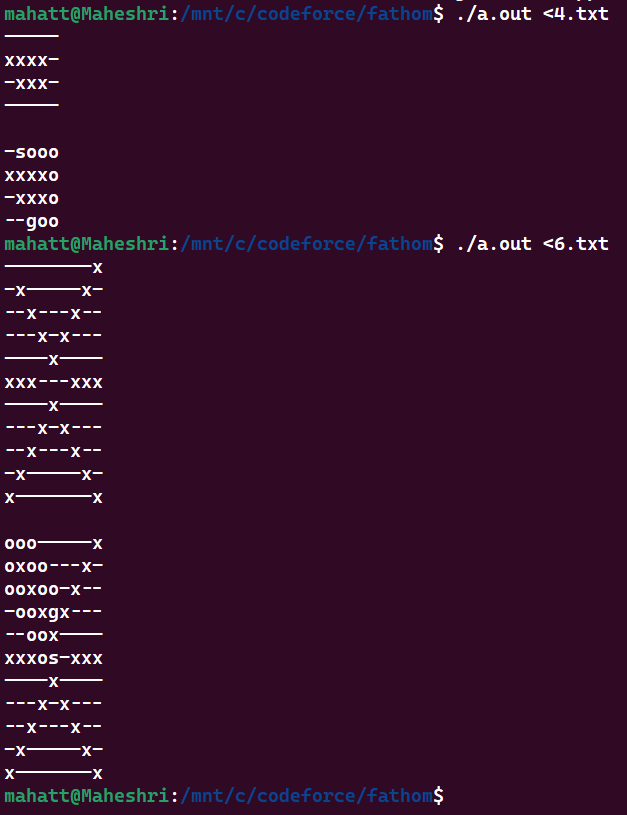